Transfer Learning Using Fine Tuning

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

2024-10-13 00:48:40.547483: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
conv_base = VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (225,225,3)
)

2024-10-13 00:48:52.024422: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 00:48:52.086257: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-13 00:48:52.086688: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 225, 225, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 225, 225, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 225, 225, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
conv_base.trainable = True
set_trainable = False

In [5]:
for layer in conv_base.layers:
  if layer.name == "block5_conv1":
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
  print(layer.name,layer.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [6]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [7]:
trainds = keras.utils.image_dataset_from_directory(
    directory = './data/train',
    batch_size = 32,
    image_size = (225,225),
    labels = 'inferred',
    label_mode = 'int'
)

Found 20000 files belonging to 2 classes.


In [11]:
validationds = keras.utils.image_dataset_from_directory(
    directory = './data/test',
    batch_size = 32,
    image_size = (225,225),
    labels = 'inferred',
    label_mode = 'int'
)

Found 5000 files belonging to 2 classes.


In [12]:
def process(image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

trainds = trainds.map(process)
validationds = validationds.map(process)

In [13]:
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),metrics=['accuracy'])

In [14]:
history = model.fit(trainds,epochs=10,validation_data=validationds)

Epoch 1/10


I0000 00:00:1728760841.599430   49388 service.cc:145] XLA service 0x72fbb0007080 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728760841.599537   49388 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-10-13 00:50:41.921814: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-13 00:50:42.151858: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
2024-10-13 00:50:43.314047: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.80GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-13 00:50:44.211841: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Al

625/625 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.8790 - loss: 0.2750

2024-10-13 00:54:32.712010: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.28GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-13 00:54:34.229953: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-13 00:54:35.633755: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.14GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


625/625 ━━━━━━━━━━━━━━━━━━━━ 237s 348ms/step - accuracy: 0.8791 - loss: 0.2749 - val_accuracy: 0.9586 - val_loss: 0.1019
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 213s 342ms/step - accuracy: 0.9588 - loss: 0.1000 - val_accuracy: 0.9608 - val_loss: 0.1018
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9768 - loss: 0.0602 - val_accuracy: 0.9556 - val_loss: 0.1149
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9874 - loss: 0.0370 - val_accuracy: 0.9702 - val_loss: 0.0772
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9932 - loss: 0.0211 - val_accuracy: 0.9682 - val_loss: 0.0895
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9967 - loss: 0.0135 - val_accuracy: 0.9702 - val_loss: 0.0887
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9972 - loss: 0.0084 - val_accuracy: 0.9720 - val_loss: 0.0985
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 214s 342ms/step - accuracy: 0.9989 - loss: 0.00

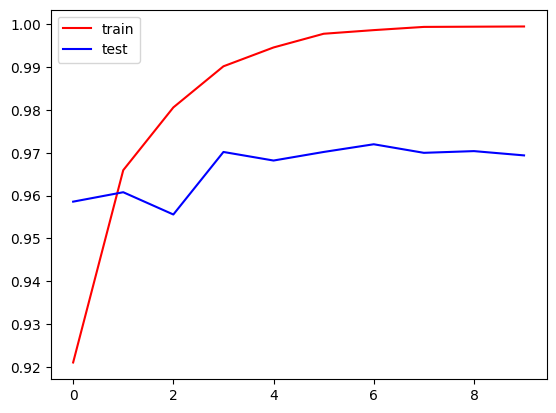

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.legend()

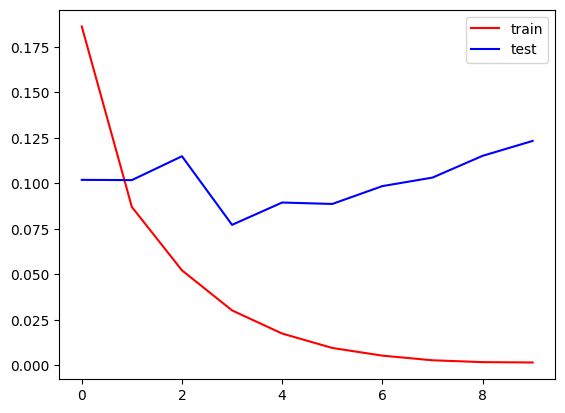

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()